<a href="https://colab.research.google.com/github/oleo2003/group_5_repo/blob/main/1)_Loading_and_Preparing_Data_for_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(**Note:**
Click on the button that reads *“Open in Colab”* to open this code in Google Colab. Once open in Google Colab, you can make a copy of the notebook in your personal drive and run the code by clicking a little triangle/arrow to the left of each code block.)

# **Welcome to Antibiotic Resistance Prediction for E.Coli using Machine Learning**

## ***Summary***:

Antibiotic resistance is a global public health concern. Bacteria are evolving resistance to the current prescribed antibiotics resulting in strains developing multi-drug resistance. Currently, clinics often perform traditional culture-based assays (i.e., testing whether a drug would kill the bacteria in a petri dish) to determine antibiotic resistance in bacterial strains. Alternatively, clinics can also sequence these strains. These sequences can be analyzed to predict resistance to a prescribed antibiotic. There are different ways to perform the analysis and Machine Learning is one of them. This series of tutorials intends to help you understand how to do such an analysis.

We will process publically available whole genome sequences of *E. coli* strains to create Logistic Regression, Random Forest, Gradient Boosted Trees, and Neural Network models to predict **Resistance (R)** and **Susceptibility (S)** for each strain. The strains have already been tested in the lab, so we will
later be able to compare the predictions made by our Machine Learning models with the traditional culture-based assays results in order to determine the performance for each of these models.

The data and the approach we take are similar to a previously published paper (Moradigaravand 2018), with the exception that we will be using using Multi Locus Sequence Typing (MLST) to perform a block cross validation. We will then use only 2 features: Year of isolation and Gene Presence / Absence data.

<a name="cell-id"></a>
### ***Data origins***:
**Publication**:
Moradigaravand D, Palm M, Farewell A, Mustonen V, Warringer J, Parts L (2018) Prediction of antibiotic resistance in *Escherichia coli* from large-scale pan-genome data. PLoS Comput Biol 14(12): e1006258. https://doi.org/10.1371/journal.pcbi.1006258

Github link: https://github.com/DaneshMoradigaravand/PanPred

**Online Database**:
To consider population structure we used Sequence Type (ST) that were extracted from the online database EnteroBase, which is a user friendly online resource to seach or upload genetic data samples of E.Coli for analysis. This tutorial uses the Achtman 7 Gene MLST scheme.
Website: https://enterobase.warwick.ac.uk/species/index/ecoli

### ***Objectives of this Notebook***:

- The Objective of this first notebook is to explore and undertand the data we will be using as features to predict susceptibility (S) or resistance (R) in *E.coli* Bacteria for several drugs.

- In addition we will see in this notebook how to explore, clean up and pre-process our data before feeding it into different machine learning algorithms.

## **1) Importing all necessary packages for Dataframe Manipulation**

The code below will allow you to import the packages needed to load and pre-process the data used for our models.

**NOTE:** Please allow access to your google drive when prompted, this will let you create and store the files in your drive to be accessed later by subsequent notebooks as we make progress towards getting our final results.

In [2]:
# Data Wrangling Imports
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from functools import reduce

# Data visualization
import matplotlib.pyplot as plt

# File Manipulation Imports
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2) Loading all Datasets used for Predictions**

The code below will load the datasets we use from Moragadivand's github page (link located in the [Data origin](#cell-id) section). There are three datasets used:

**a) Metadata**: Year of isolation, Sequence Type based on MLST and results from Antimicrobial Susceptibility Testing.

**b) Gene Presence and Absence**: Not all *E. coli* strains carry the same accesory genes. We have a list of genes and information for each strain on whether it carries that gene.


In [3]:
# assign to url variable for each csv file
metadata_url = 'https://raw.githubusercontent.com/Lucy-Moctezuma/ML-Tutorial-for-Antibiotic-Resistance-Predictions-for-E.-Coli/main/Datasets/Metadata.csv'
gene_presence_url = 'https://raw.githubusercontent.com/Lucy-Moctezuma/ML-Tutorial-for-Antibiotic-Resistance-Predictions-for-E.-Coli/main/Datasets/AccessoryGene.csv'

# load the three csv files into the notebook
metadata = pd.read_csv(metadata_url)
gene_presence_data = pd.read_csv(gene_presence_url)

### **a) Metadata:**

#### **a.1) Columns Summary:**



- **Lane.Ascession**: Unique identifier given to a DNA sequence record to allow their tracking in sequence databases. We used this number to extract the MLST information in [EnteroBase](https://enterobase.warwick.ac.uk/species/index/ecoli).
- **MLST**: Short for Multi Locus Sequence Typing. This is an unambiguous procedure that characterizes bacterial species using the sequences of internal fragments of seven house-keeping genes.
- **Isolate number**: Unique number assigned to identify a particular strain of *E. coli* Bacteria. Thus we will refer to each row of our dataset as an "Isolate" from now on.
- **Year of Isolation**: The year in which a particular bacterial isolate was collected from a patient.
- **Antibiotic drug**: There are 12 antibiotic drug columns named after their 3 letter abbreviation adopted from the "British Society of Antimicrobial Chemotherapy".

|Abreviation|Class: Subclass|Full name|
|:----------|:--------------|:--------|
|**CTZ**|Beta-lactams: Cephalosporins|Ceftazidime|
|**CTX**|Beta-lactams: Cephalosporins|Cefotaxime |
|**CXM**|Beta-lactams: Cephalosporins|Cefuroxime|
|**CET**|Beta-lactams: Cephalosporins|Cephalothin|
|**AMP**|Beta-lactams: Penicillin|Ampicillin|
|**AMX**|Beta-lactams: Penicillin|Amoxicillin|
|**AMC**|Beta-lactams: Penicillin|Amoxicillin + Clavulanate potassium|
|**TZP**|Beta-lactams: Piperacillin|Tazobactam|
|**GEN**|Aminoglycosides|Gentamicin|
|**TBM**|Aminoglycosides|Tobramycin|
|**TMP**|Antifolate|Trimethoprim|
|**CIP**|Fluoroquinolones|Ciprofloxacin|


In [4]:
# Visualize the first 5 rows of our dataframe
metadata.head()

,Lane.accession,MLST,Isolate,Year,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,CET,GEN,TBM,TMP,CIP
0,ERR435312,68.0,11679_6#21,2001.0,S,NaN,NaN,S,S,S,R,NaN,R,NaN,NaN,R
1,ERR434919,652.0,11658_6#85,2005.0,S,S,NaN,S,S,S,S,NaN,S,NaN,NaN,S
2,ERR434399,95.0,11657_6#45,2005.0,S,S,NaN,R,R,R,S,NaN,S,NaN,NaN,S
3,ERR434695,73.0,11658_4#53,2005.0,S,S,NaN,R,S,S,S,NaN,S,NaN,NaN,S
4,ERR434696,73.0,11658_4#54,2005.0,S,S,NaN,R,S,S,S,NaN,S,NaN,NaN,S


**Note**: NaN was used to mark when there is no data for that isolate and drug.

In [5]:
# Observe the shape and size of the dataframe
metadata.shape

(1936, 16)

The code above can show us the shape of our entire dataframe in the following format: **(Row count, Column count)**

**a) Row count**: There is a total of 1936 Isolates of *E. coli* Bacteria.

**b) Column count**: is 16 = Lane Ascesion (1) + MLST(1) + Isolate number (1) + year (1)+ antibiotic laboratory test results (12)


#### **a.2) Multi Locus Sequence Typing (MLST):**

The E. coli genome is composed of one circular chromosome with many genes. This tutorial uses the Achtman 7 Gene MLST scheme. Using this classification rule E. coli bacterial isolates are classified based their sequences at 7 house-keeping genes: **adk, fumC, gyrB, icd, mdh, purA, recA**

**3 Examples of MLST Classification**

Each of these genes have a database of alleles. **Alleles** are alternative forms of a gene that arise by mutation and are found at the same place on a chromosome.

Different combinations of alleles for each of the 7 house-keeping genes  determine what ST group a particular isolate belongs to. In the example below the isolates with accension number ERR434280 and ERR434922 belong to the same Sequence Type (131), because the combination of alleles for each of these 7 genes are the same.

![MLST graph](https://drive.google.com/uc?export=view&id=1SFBXOIsRoSSHQgEFMtkPlvPflu8PFAXN)

Below we can see that we have a total of **337** different Sequence Types (ST) in our dataset.

In [6]:
# This prints the mlst sequence types the strains belong to
mlst_list = metadata["MLST"].unique()
mlst_list = mlst_list[np.logical_not(np.isnan(mlst_list))]
print(sorted(mlst_list))
print(len(mlst_list))

[np.float64(-52.0), np.float64(-49.0), np.float64(-48.0), np.float64(-47.0), np.float64(-44.0), np.float64(3.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(14.0), np.float64(20.0), np.float64(23.0), np.float64(28.0), np.float64(34.0), np.float64(38.0), np.float64(43.0), np.float64(44.0), np.float64(46.0), np.float64(48.0), np.float64(57.0), np.float64(58.0), np.float64(59.0), np.float64(62.0), np.float64(68.0), np.float64(69.0), np.float64(70.0), np.float64(73.0), np.float64(74.0), np.float64(75.0), np.float64(79.0), np.float64(80.0), np.float64(83.0), np.float64(86.0), np.float64(88.0), np.float64(90.0), np.float64(91.0), np.float64(93.0), np.float64(95.0), np.float64(100.0), np.float64(101.0), np.float64(104.0), np.float64(106.0), np.float64(115.0), np.float64(117.0), np.float64(121.0), np.float64(124.0), np.float64(126.0), np.float64(127.0), np.float64(129.0), np.float64(130.0), np.float64(131.0), np.float64(135.0), np.float64(136.0), np.float64(141.0), np.floa

To not confuse these groups as numerical data, we will add the letters "ST" in front of the numbers, so that python reads them as categorical data.

We can also break the composition of these ST groups in our data in a barchart, showing the 15 most abundant ST groups:

<Axes: title={'center': '15 most common Sequence Types in Data'}, ylabel='MLST'>

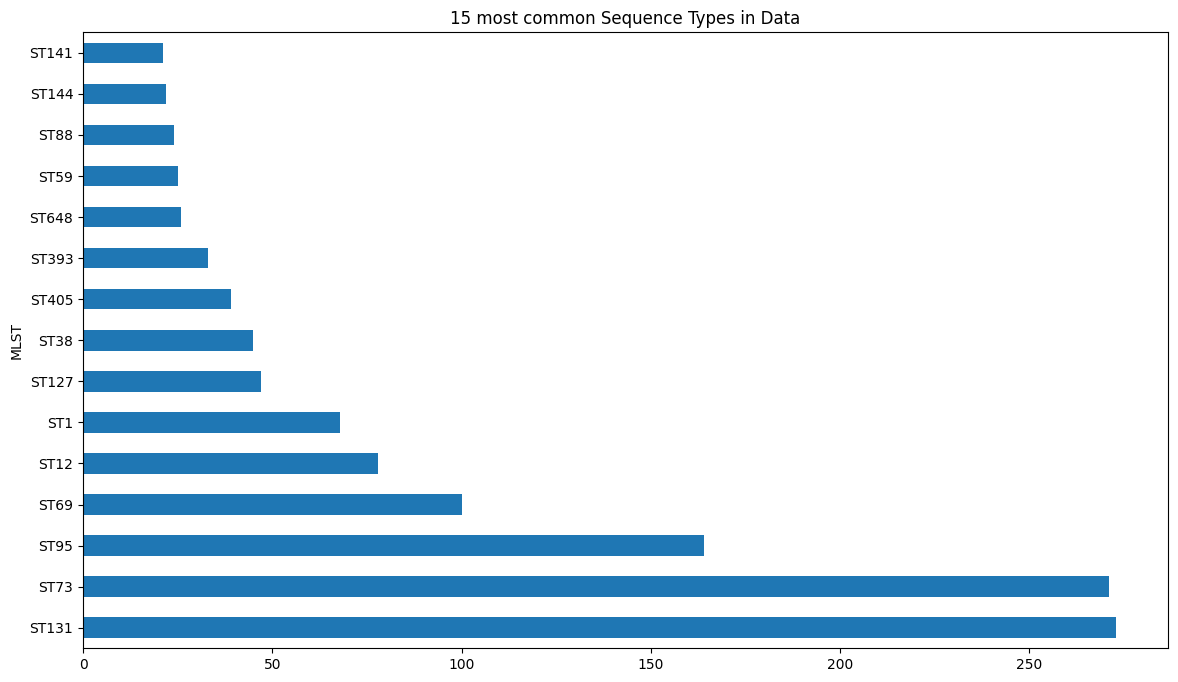

In [7]:
# Check that MLST column is numeric
if is_numeric_dtype(metadata['MLST']):
  # If it is, Add ST infront of numbers to make them into categorical data and strip .0
  metadata['MLST'] = 'ST' + metadata['MLST'].astype(str)
  metadata['MLST'] = metadata['MLST'].map(lambda x: x.rstrip('.0'))
else:
  # If not then make no changes
  metadata['MLST']

# making bar graph to show how many strains we have for each ST group
bplotdata = metadata['MLST'].value_counts().sort_values(ascending = False).head(15)
bplotdata.plot(kind='barh',figsize=(14,8),title="15 most common Sequence Types in Data")

When we use ML methods and DNA sequences, there is a concern that the method may learn to recognize related isolates. The ML predictions may then be right but simply because highly related  isolates were present in the training and the test dataset.
To make sure this doesn’t happen, we can make sure that all samples of one ST are put in either training or in validation data, but not both.
Different researchers take different approaches to do this and we expect that in the future a standard will emerge. For now, this tutorial provides code to perform block design based on Sequence Types.  

#### **a.3) Determination of Resistant(R) and Susceptible(S) labels:**

- **Antimicrobial Susceptibility Testing**:
Laboratory test where a bacterial isolate is grown in the presence of different concentrations of a drug to determine whether it is Susceptible(S), Intermediate (I) or Resistance(R).

- **Clinical Breakpoints**: Each of the drugs listed in the chart have a different concentration (clinical breakpoint) used to determine the Susceptibility or Resistance of *E. coli* to that drug. If the bacterium can grow at a drug concentration higher than the breakpoint, it is considered resistant.

- Results from the laboratory tests were determined based on the guidelines from the [European Committee on Antimicrobial Susceptibility Testing (EUCAST)](https://www.eucast.org/videos_and_online_seminars/english) on 25/01/2017. Click on the link to see a series of videos on how the laboratory tests are done.

- In Moragadivand's paper, isolates that were classified as Intermediate(I) were lumped together with the Resistant ones, therefore we are going to do the same in this tutorial.

In [8]:
# Checking how many isolates are Resistant vs Susceptible to AMX antibiotic drugs
metadata['AMX'].value_counts()

,count
AMX,
R,662
S,432


### **b) Gene presence and absence:**

**Genes:** Sequences of DNA that (usually) code for proteins. These sequences can vary in length and the resulting proteins have a variety of functions. Some genes and their resulting proteins are well characterized and have names, whereas others are not well characterized. For our analysis, the genes from our data set will be generally classified into:

- **Core Genome:** These are the genes that are present in almost all individuals for a particular species. In our case, they are the genes that all our *E.coli* isolates have in common. These genes are not present in our dataset because they would be the same for all *E.Coli* samples

- **Accessory Genes:** These are the genes that might be found in one individual but may not be found in another, within the same species. A gene presence / absence table lists which isolates have which genes.

- **Pan-genome:** These are all the possible genes that can be found in a particular species. That is they are all the gene presents present in our *E. coli* isolates (Pan-genome = Core Genome + Accesory Genes).

The code below will show us the dataframe containing the presence and absence of all the genes detected in for each isolate.
- **0** = Absence of the gene
- **1** = Presence of the gene.



In [9]:
# Visualize the first 5 rows of accessory genes
gene_presence_data.head()

,Unnamed: 0,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,11657_5#1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,11657_5#10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,11657_5#11,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,11657_5#12,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,11657_5#13,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Not all genes are well known and have names, therefore the software that creates a gene presence / absence table has separated them in 2 sets of genes that were named differently:

**1) Named genes**: which were extracted from the annotated DNA sequences.

In the code below we can take a look at all the names of the named genes because **they do not have the word "group"** in them.

In [10]:
# this code will output the list of named genes and the length of it
named_genes = [col for col in gene_presence_data.drop(columns=["Unnamed: 0"]).columns if 'group' not in col]
print("List of named_genes:")
print(named_genes)
print("Total number of named genes included: ", len(named_genes))

List of named_genes:
['yeiU', 'yhhS', 'ybaE', 'eutR', 'ibrB', 'ytfP', 'aslB', 'narQ', 'tolR', 'galM', 'modB', 'pgl', 'glnQ', 'ydjM', 'osmE', 'rcsF', 'fruB', 'rsuA', 'yfcA', 'ypfN', 'pdxJ', 'plsX', 'ycfF', 'minD', 'marC_2', 'sugE', 'psd', 'nsrR', 'rnfA', 'kbl', 'greB', 'mgsA', 'mukE', 'dtd', 'cpxP', 'fbp', 'luxS', 'fldB', 'epd', 'phoR', 'adk', 'ybbN', 'ilvM', 'ilvE', 'fre', 'glmM', 'gpt', 'aaeX', 'ygcM', 'rplS', 'raiA', 'cvrA', 'hflC_2', 'mgtA', 'speC_2', 'yfeK', 'fsr', 'trmA', 'cmr', 'yceL', 'flgE', 'narG', 'ptsA', 'dmlR_6', 'mutS', 'ybgC', 'moaC', 'artM_1', 'agp', 'sdaA', 'ruvC', 'pgsA', 'yecF', 'yaeT', 'ftsQ', 'ksgA', 'ytjA', 'sanA', 'ccmG', 'nuoK', 'suhB', 'yfiD', 'rpmF', 'fabG_3', 'lolD_2', 'prfA', 'frdC', 'ftsE', 'ycaR', 'cmk', 'fepC', 'ftsB', 'hypA', 'xerD_1', 'rsmE', 'xseB', 'ybaZ', 'ybaB', 'ptsN', 'yeeX', 'yhbP', 'gmr_1', 'sgrR', 'poxB', 'putA', 'clpA', 'ypdC_1', 'pdxK', 'folM', 'ugpB', 'astA', 'yeiA', 'flgK', 'rne', 'chaA', 'mobB', 'ebgA', 'allS_1', 'chaC', 'pdxY', 'yciH', 'rf

**2) Unnamed genes**: these are the DNA sequences that look like a gene (e.g., they have a start and a stop codon) and are grouped based on **orthologous gene groups**. This means that these are sequences where we don't necessarily know their function, but we know that they exist in many of the *E. coli* isolates, **they get a name that starts with "group"**.

**NOTE: Orthologous genes**: are genes that derive from the same ancestral gene.





In [11]:
# this code will output all the genes without an assigned gene name.
other_genes = [col for col in gene_presence_data.drop(columns=["Unnamed: 0"]).columns if 'group' in col]
print("List of unnamed genes:")
print(other_genes)
print("Total number of unnamed genes included: ", len(other_genes))

List of unnamed genes:
['group_1150', 'group_16546', 'group_2705', 'group_3304', 'group_4923', 'group_4964', 'group_5584', 'group_8156', 'group_8252', 'group_149', 'group_2086', 'group_4319', 'group_5721', 'group_6765', 'group_6877', 'group_698', 'group_8153', 'group_16576', 'group_2284', 'group_6886', 'group_8258', 'group_944', 'group_11031', 'group_1129', 'group_1555', 'group_16561', 'group_2491', 'group_5642', 'group_6779', 'group_776', 'group_10930', 'group_2199', 'group_2731', 'group_4247', 'group_4302', 'group_1533', 'group_1556', 'group_2333', 'group_2498', 'group_2757', 'group_3978', 'group_781', 'group_817', 'group_1153', 'group_1304', 'group_1320', 'group_3797', 'group_6621', 'group_4315', 'group_1139', 'group_4791', 'group_1752', 'group_2311', 'group_3038', 'group_3099', 'group_3784', 'group_4906', 'group_6713', 'group_6771', 'group_1132', 'group_6802', 'group_10939', 'group_1390', 'group_472', 'group_3791', 'group_1518', 'group_3896', 'group_1558', 'group_137', 'group_3451'

**NOTE:** The code below is showing us which Isolates have the ortholog gene group called **"group_13605"** In this case we have 8 isolates that have this gene.

In [12]:
# the code below prints all the isolate numbers that have a 1 (presence) for a particular group
print(gene_presence_data[gene_presence_data["group_13605" ]== 1]["Unnamed: 0"])

222      11657_7#39
895      11679_4#73
922      11679_5#10
1066     11679_6#56
1739    24742_1#155
1881    24742_1#295
1883    24742_1#297
1912    24742_1#324
Name: Unnamed: 0, dtype: object


The code below can show us the shape of our entire dataframe in the following format: **(Row count, Column count)**

**a) Row count**: Notice that the number of isolates is 2033, whereas in the Metadata file there were only 1936. We can only work with isolates for which we have metadata, so later on we will filter out the ones that do not have a corresponding metadata.

**b) Column count**: The number of columns is 17199 = Isolate number(1) + named_genes(3815) + unnamed_genes(13383)

In [13]:
# Observe the shape and size of the dataframe
gene_presence_data.shape

(2033, 17199)

## **3) Final dataset used in subsequent notebooks**

#### **a)** Making a single dataframe using both data sources

**Notes:**
- **lambda** is an expression used to create python functions without needing to name them specifically, in this case we are asking to merge our dataframes from left to right, so metadata_d first and then gene_presence_data.
- **reduce** is a function that allow us to repeat a particular function on a list of objects. This was done because the merge function only takes 2 dataframes at the time. This way you can include as many dataframes you want to merge in our **df_list** in case you want to work with more features.
- The function **merge()**, allows to pass the parameter **(on ="Isolate")**, which will ensure that each isolate number is correctly matched for both data sources, the parameter **(how="inner")** will make sure that isolates without a match are not included in the final dataframe.

In [14]:
# matching the Isolate column name for both datasets
gene_presence_data.rename(columns={'Unnamed: 0': 'Isolate'}, inplace=True)

# List of data sources
df_list = [metadata,gene_presence_data]

# creating a single dataframe with all drugs and features available
Drug_df = reduce(lambda  left,right: pd.merge(left,right,on=['Isolate'], how='inner'), df_list)
Drug_df.head()


,Lane.accession,MLST,Isolate,Year,CTZ,CTX,AMP,AMX,AMC,TZP,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,ERR435312,ST68,11679_6#21,2001.0,S,NaN,NaN,S,S,S,...,0,0,0,0,0,0,0,0,0,0
1,ERR434919,ST652,11658_6#85,2005.0,S,S,NaN,S,S,S,...,0,0,0,0,0,0,0,0,0,0
2,ERR434399,ST95,11657_6#45,2005.0,S,S,NaN,R,R,R,...,0,0,0,0,0,0,0,0,0,0
3,ERR434695,ST73,11658_4#53,2005.0,S,S,NaN,R,S,S,...,0,0,0,0,0,0,0,0,0,0
4,ERR434696,ST73,11658_4#54,2005.0,S,S,NaN,R,S,S,...,0,0,0,0,0,0,0,0,0,0


#### **b)** Deleting Lane.accession number

Because Lane.Ascession and Isolate number are both forms of to identify the same observation we can eliminate Lane.Ascession as it will not be useful to our models.

In [15]:
# Deleting Ascension number
Drug_df.drop(columns=["Lane.accession"], axis=1, inplace=True)
Drug_df.head()

,MLST,Isolate,Year,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,ST68,11679_6#21,2001.0,S,NaN,NaN,S,S,S,R,...,0,0,0,0,0,0,0,0,0,0
1,ST652,11658_6#85,2005.0,S,S,NaN,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
2,ST95,11657_6#45,2005.0,S,S,NaN,R,R,R,S,...,0,0,0,0,0,0,0,0,0,0
3,ST73,11658_4#53,2005.0,S,S,NaN,R,S,S,S,...,0,0,0,0,0,0,0,0,0,0
4,ST73,11658_4#54,2005.0,S,S,NaN,R,S,S,S,...,0,0,0,0,0,0,0,0,0,0


- Notice that the number of rows is now correctly matched with Isolate number, yielding a total of 1936 rows as in the metadata.

- Also we now have a bunch of columns that currently include:
  - **1 MLST column** this column could be used to as a blocking factor
  - **1 isolate column** these are the unique tags for each of our isolates.
  - **12 labels**, one for each drug we will try to make predictions for.
  - **1 Year column** this column corresponds to the isolation year
  - **17198 features** that we will be using to make prediction for the labels (isolation year and gene presence or absence).


In [16]:
# Check out all the columns included in the final dataframe and the final shape it takes
print(Drug_df.columns) # contains all labels (drug abreviation column names)
                       # and all features (year, gene presence absence and population structure)

print("Final shape of combined dataframe",Drug_df.shape)

Index(['MLST', 'Isolate', 'Year', 'CTZ', 'CTX', 'AMP', 'AMX', 'AMC', 'TZP',
       'CXM',
       ...
       'group_48768', 'group_48873', 'group_48916', 'group_48933',
       'group_48937', 'group_48958', 'group_49020', 'group_49174',
       'group_49253', 'group_49257'],
      dtype='object', length=17213)
Final shape of combined dataframe (1936, 17213)


#### **c)** Convert the Dataframe into a CSV and save it in a folder

After running the code below, feel free to check your Drive to make sure that you have a folder named **"EColi_ML_CSV_files"** and that inside you have a csv called **"EColi_Merged_dfs.csv"**


In [17]:
# Note that if you have already done this – you will just get an output that this directory or file already exists.
# If you want the code to run again, delete the EColi_ML_CSV_files folder and/or EColi_Merged_df.csv file in your Drive.

try:
  # makes a directory to save all your csv's
  os.mkdir('/content/drive/My Drive/EColi_ML_CSV_files')

  # path where we will store csv data #change to any path you want
  path = '/content/drive/My Drive/EColi_ML_CSV_files/'

  # this code exports the dataframe into a CSV file
  Drug_df.to_csv(path+"EColi_Merged_df.csv", index= False)

except:
  print("Directory and file have already been created")

CONGRATULATIONS on making it this far! Now that our data is ready, we will learn how to create and train different Machine Learning models based on the csv file we just created. In the next notebook, we will learn about our first model for this tutorial series, [Logistic Regression](https://colab.research.google.com/drive/1p8AMu3YlIvViKfS58u9l7y03XEJHkY5O?usp=sharing).